# KC Housing Data

In [2]:
import matplotlib.pyplot as plt
from math import exp
from scipy.stats import norm
from scipy import stats
import seaborn as sns
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 300)
df = pd.read_csv('kc_house_data_train.csv')
df.shape

(17290, 22)

In [3]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [6]:
df.isna().sum()

Unnamed: 0       0
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,17290.000000,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,8644.500000,4.565502e+09,5.407395e+05,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,3.408502,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824
std,4991.337413,2.874656e+09,3.733190e+05,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.775229,0.651296,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583
min,0.000000,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,4322.250000,2.114701e+09,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000
50%,8644.500000,3.903650e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000
75%,12966.750000,7.301150e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000
max,17289.000000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


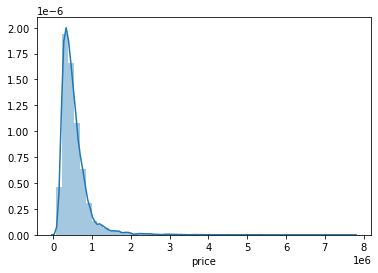

In [9]:
sns.distplot(df['price'])

In [14]:
print("Skewness: %f" % (df['price']).skew())
print("Kurtosis: %f" % (df['price']).kurt())

Skewness: 4.282599
Kurtosis: 38.520298


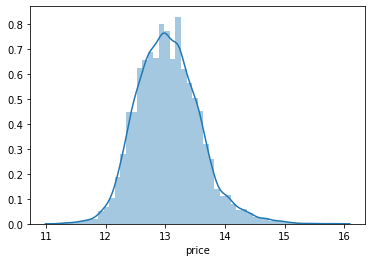

In [11]:
sns.distplot(np.log(df['price']))

In [13]:
print("Skewness: %f" % np.log(df['price']).skew())
print("Kurtosis: %f" % np.log(df['price']).kurt())

Skewness: 0.446582
Kurtosis: 0.767354


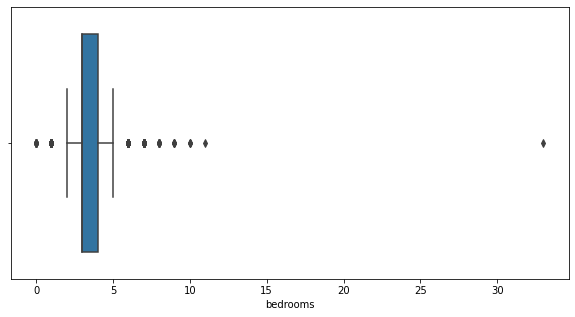

In [21]:
fig, axes = plt.subplots(figsize = (10,5))
sns.boxplot(x= 'bedrooms', data = df)

A few outliers. Need to check into bedrooms

Next, we look into any observations that may have untrue sqft reports or underestimated bedrooms.

In [22]:
df['liv_lot_ratio'] = df['sqft_living'] / df['sqft_lot']

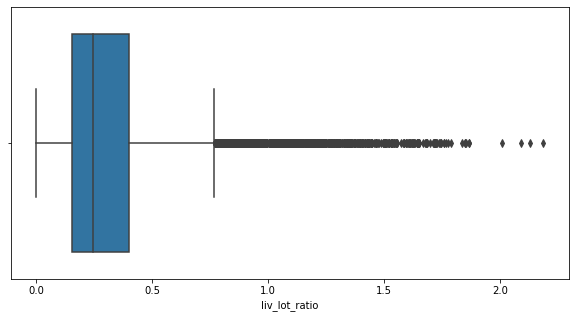

In [23]:
fig, axes = plt.subplots(figsize = (10,5))
sns.boxplot(x= 'liv_lot_ratio', data = df)

In [41]:
df['liv_lot_ratio'].mean()

0.32034193446760534

In [44]:
df['liv_lot_ratio'].max()

2.1875

In [46]:
df['liv_lot_ratio'].min()

# the lot with the smallest house to land ratio

0.0006095498431482305

In [42]:
df['liv_lot_ratio'].median()

0.24653432914046122

There are some houses that may have multiple stories. Will cross reference with price and bedrooms. 

Now to look at lots that may not be residential but businesses or farms.

In [24]:
df['lot_liv_ratio'] = df['sqft_lot'] / df['sqft_living']

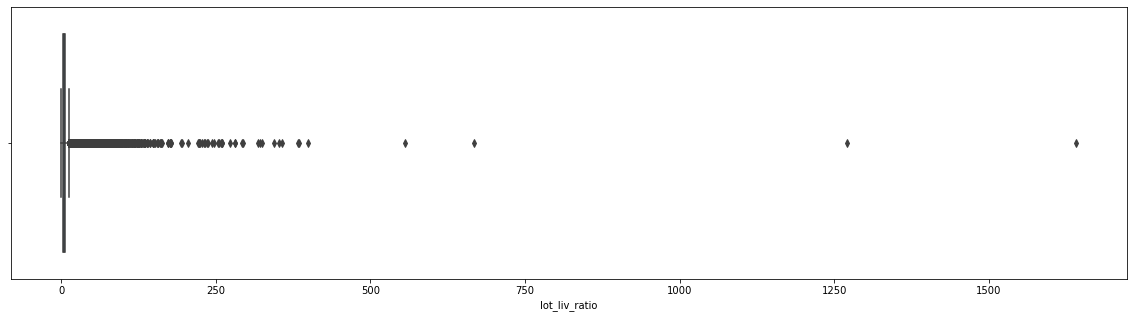

In [27]:
fig, axes = plt.subplots(figsize = (20,5))
sns.boxplot(x= 'lot_liv_ratio', data = df)

In [47]:
df['lot_liv_ratio'].mean()

7.565406095871723

In [48]:
df['lot_liv_ratio'].min()

0.45714285714285713

In [49]:
df['lot_liv_ratio'].max()

1640.5549295774647

In [50]:
df['lot_liv_ratio'].median()

4.056230238574303

There are some that may be mislabeled. Cross reference with bedrooms, bathrooms, and price. 

Going to have to sort through and determine what is a residence and what isn't.

In [28]:
df. columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'liv_lot_ratio', 'lot_liv_ratio'],
      dtype='object')

In [29]:
features = [ 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'liv_lot_ratio', 'lot_liv_ratio']

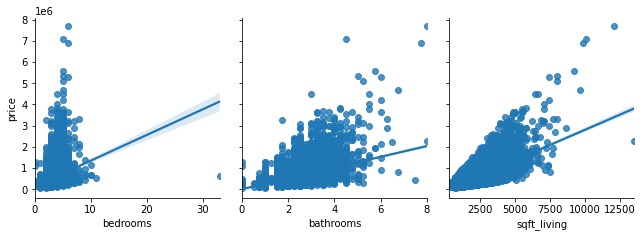

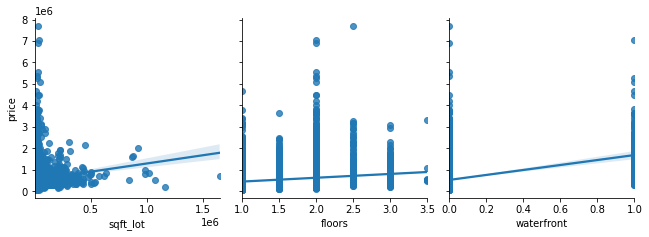

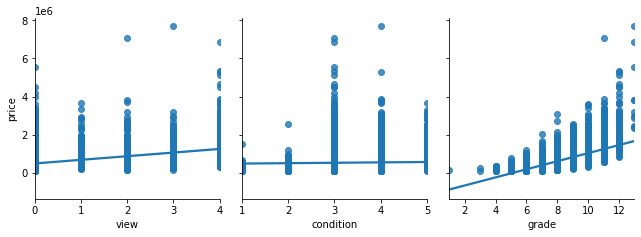

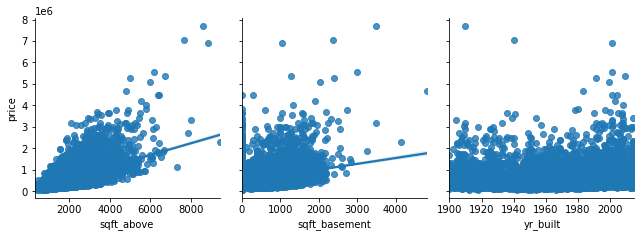

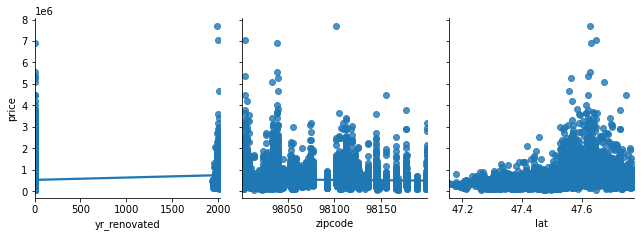

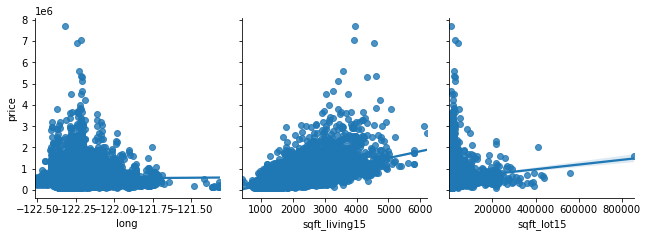

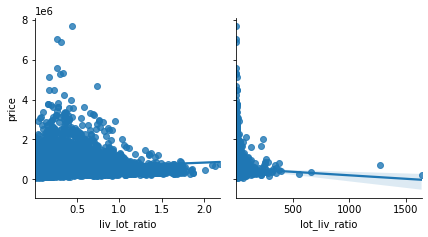

In [30]:
n = 3
row_groups= [features[i:i+n] for i in range(0, len(features), n) ]

for i in row_groups:
    pp = sns.pairplot(data=df, y_vars=['price'],x_vars=i, kind="reg", height=3)

First going to look at bedrooms

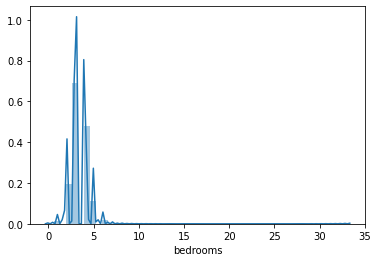

In [31]:
sns.distplot(df['bedrooms'])

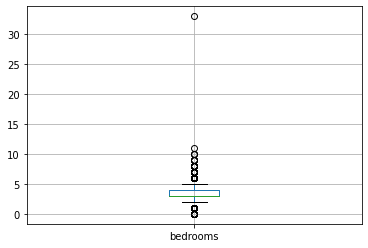

In [33]:
df.boxplot(column = 'bedrooms')

In [36]:
df['bedrooms'].value_counts()

3     7864
4     5488
2     2204
5     1283
6      229
1      160
7       30
0       12
8       10
9        5
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [40]:
df[(df['bedrooms'] >= 9) | (df['bedrooms'] < 1)]

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,liv_lot_ratio,lot_liv_ratio
483,483,3374500520,20150429T000000,355000.0,0,0.00,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050,0.305628,3.271951
1120,1120,6306400140,20140612T000000,1095000.0,0,0.00,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000,0.643157,1.554830
2356,2356,1773100755,20140821T000000,520000.0,11,3.00,3000,4960,2.0,0,0,3,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960,0.604839,1.653333
2430,2430,1222029077,20141029T000000,265000.0,0,0.75,384,213444,1.0,0,0,3,4,384,0,2003,0,98070,47.4177,-122.491,1920,224341,0.001799,555.843750
3032,3032,7849202190,20141223T000000,235000.0,0,0.00,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200,0.306250,3.265306
3425,3425,424049043,20140811T000000,450000.0,9,7.50,4050,6504,2.0,0,0,3,7,4050,0,1996,0,98144,47.5923,-122.301,1448,3866,0.622694,1.605926
3609,3609,2569500210,20141117T000000,339950.0,0,2.50,2290,8319,2.0,0,0,3,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751,0.275273,3.632751
3680,3680,8812401450,20141229T000000,660000.0,10,3.00,2920,3745,2.0,0,0,4,7,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745,0.779706,1.282534
5424,5424,3918400017,20150205T000000,380000.0,0,0.00,1470,979,3.0,0,2,3,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399,1.501532,0.665986
6409,6409,1453602309,20140805T000000,288000.0,0,1.50,1430,1650,3.0,0,0,3,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650,0.866667,1.153846


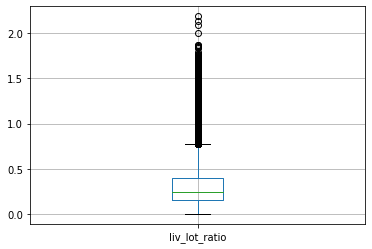

In [34]:
df.boxplot(column = 'liv_lot_ratio')

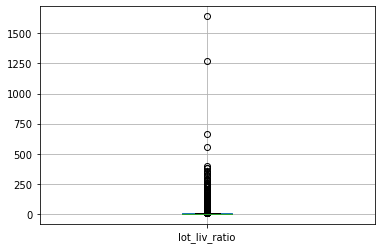

In [35]:
df.boxplot(column = 'lot_liv_ratio')